In [23]:
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve
from sklearn import svm
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt
import sklearn

In [24]:
pickle_in = open("Xt.pickle","rb")
Xt = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("yt.pickle","rb")
yt = pickle.load(pickle_in)
pickle_in.close()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(Xt, yt, test_size=0.25 ,random_state=10)

In [26]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
clf = svm.SVC(kernel='rbf',C=10,probability=True)

In [28]:
clf.fit(X_train[:5000, :], y_train[:5000])
y_pred = clf.predict(X_test[:1000, :])

In [29]:
accuracy = accuracy_score(y_test[:1000], y_pred)

C:\Users\abdal\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


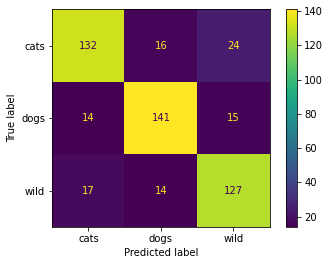

In [30]:
plot_confusion_matrix(clf, X_test[:500, :], y_test[:500], values_format = 'd', display_labels=['cats', 'dogs', 'wild'])

In [31]:
print("Accuracy:",accuracy)


Accuracy: 0.812


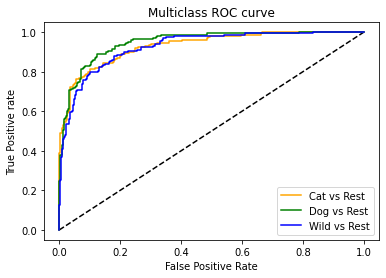

In [32]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3
y_score = clf.predict_proba(X_test[:500,:])
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test[:500], y_score[:,i], pos_label=i)
    
 
plt.plot(np.array([0,1]),linestyle='--',color='black')
plt.plot(fpr[0], tpr[0], linestyle='-',color='orange', label='Cat vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='-',color='green', label='Dog vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='-',color='blue', label='Wild vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
  

[learning_curve] Training set sizes: [  4  68 131 195 259 322 386 450]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.2min finished


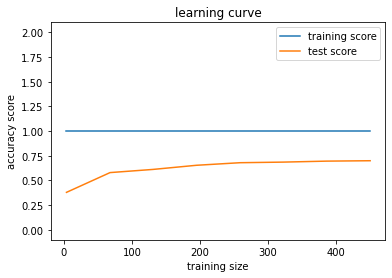

In [33]:
train_sizes ,train_scores ,test_scores =learning_curve(clf, Xt[:500,:], yt[:500], cv=10, scoring='accuracy'
 ,n_jobs=-1 ,train_sizes=np.linspace(0.01,1,8) ,verbose=1)

train_mean =np.mean(train_scores , axis=1)
train_mean

train_std =np.mean(train_scores , axis=1)   
train_std

test_mean =np.mean(test_scores , axis=1)
test_mean

test_std =np.mean(test_scores , axis=1)
test_std

plt.plot(train_sizes , train_mean ,label='training score')
plt.plot(train_sizes , test_mean ,label='test score')

plt.fill_between(train_sizes-train_std , train_mean+train_std ,color='#ffffff' )
plt.fill_between(train_sizes-test_std , test_mean+test_std ,color='#ffffff' )

plt.title('learning curve')
plt.xlabel('training size')
plt.ylabel('accuracy score')
plt.legend(loc = 'best')
